In [25]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")


999

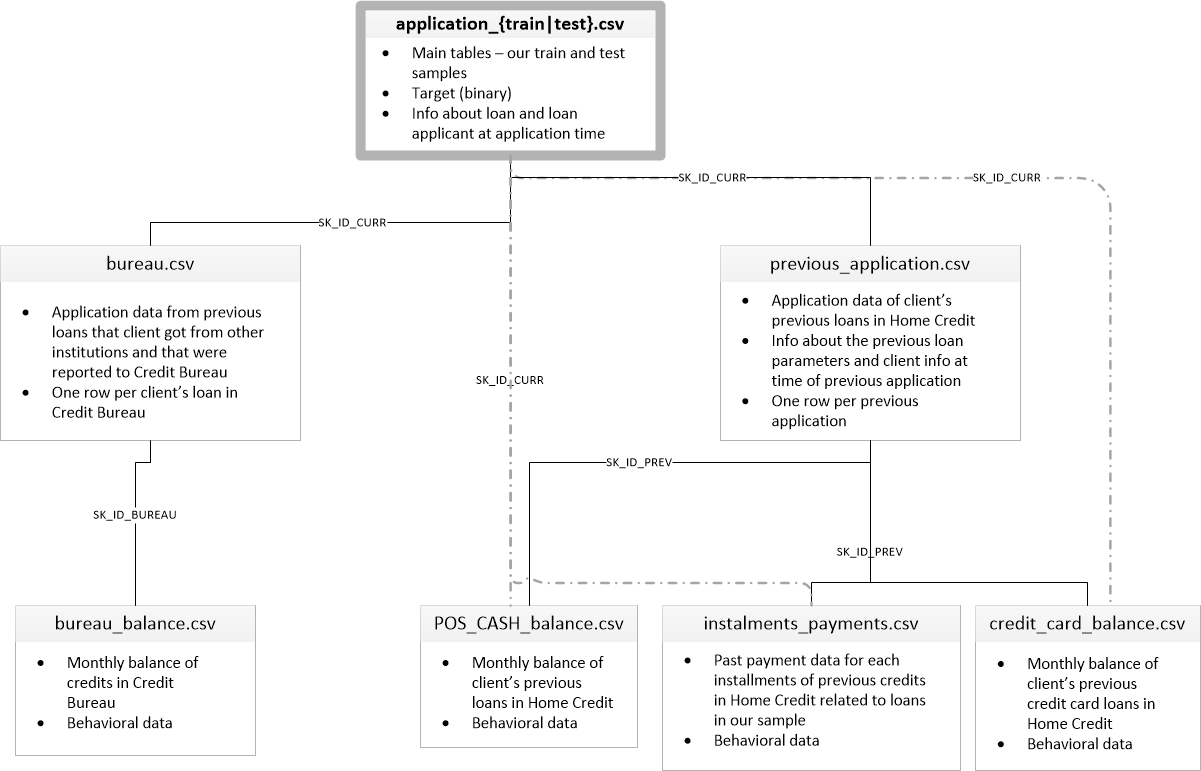

In [26]:
previous_application = pd.read_csv("previous_application.csv")

In [27]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
previous_application.shape

(1670214, 37)

In [29]:
previous_application["SK_ID_PREV"].nunique()
# 1 row per previous loan

1670214

In [30]:
previous_application["SK_ID_CURR"].nunique()

338857

In [31]:
# missing
def missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing(previous_application)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


In [32]:
#drop columns RATE_INTEREST_PRIVILEGED	1664263	99.643698
#RATE_INTEREST_PRIMARY	1664263	99.643698

previous_application = previous_application.drop(["RATE_INTEREST_PRIVILEGED", "RATE_INTEREST_PRIMARY"], axis =1)

In [33]:
# Fill na with 0 
#RATE_DOWN_PAYMENT	895844	53.636480
#AMT_DOWN_PAYMENT	895844	53.636480
previous_application[["RATE_DOWN_PAYMENT", "AMT_DOWN_PAYMENT"]] = previous_application[["RATE_DOWN_PAYMENT", "AMT_DOWN_PAYMENT"]].fillna(0)

In [34]:
previous_application[previous_application["SK_ID_CURR"]==428197].sort_values("DAYS_DECISION")

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1447034,1897006,428197,Consumer loans,10510.965,97110.0,94608.0,9711.0,97110.0,SATURDAY,13,Y,1,0.101383,XAP,Approved,-2529,Cash through the bank,XAP,Children,New,Computers,POS,XNA,Country-wide,3268,Consumer electronics,10.0,low_normal,POS household without interest,365243.0,-2498.0,-2228.0,-2228.0,-2220.0,1.0
1028937,1807846,428197,Revolving loans,7875.000,0.0,157500.0,0.0,NaN,TUESDAY,7,N,1,0.000000,XAP,Canceled,-2293,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Stone,850,Consumer electronics,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
40366,1008360,428197,Revolving loans,7875.000,0.0,157500.0,0.0,NaN,THURSDAY,12,Y,1,0.000000,XAP,Approved,-2216,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Stone,850,Consumer electronics,0.0,XNA,Card X-Sell,-2203.0,-2159.0,365243.0,-586.0,365243.0,0.0
272252,1472729,428197,Cash loans,9990.900,126000.0,138474.0,0.0,126000.0,FRIDAY,12,Y,1,0.000000,XNA,Approved,-1235,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,middle,Cash X-Sell: middle,365243.0,-1205.0,-695.0,-785.0,-778.0,1.0
272253,2344648,428197,Cash loans,12780.270,117000.0,124722.0,0.0,117000.0,SATURDAY,9,Y,1,0.000000,XNA,Approved,-786,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-756.0,-426.0,-696.0,-679.0,1.0
1207787,2583657,428197,Cash loans,26792.370,360000.0,384948.0,0.0,360000.0,FRIDAY,11,Y,1,0.000000,XNA,Approved,-724,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-694.0,-184.0,-334.0,-330.0,1.0
753115,1189256,428197,Consumer loans,9396.225,29502.0,27252.0,2952.0,29502.0,WEDNESDAY,9,Y,1,0.106443,XAP,Approved,-474,Cash through the bank,XAP,NaN,Repeater,Clothing and Accessories,POS,XNA,Stone,10,Clothing,3.0,low_normal,POS industry without interest,365243.0,-442.0,-382.0,-382.0,-379.0,0.0
174592,1595622,428197,Consumer loans,10178.685,85050.0,92533.5,0.0,85050.0,THURSDAY,12,Y,1,0.000000,XAP,Approved,-361,Cash through the bank,XAP,NaN,Repeater,Clothing and Accessories,POS,XNA,Stone,28,Clothing,10.0,low_normal,POS industry with interest,365243.0,-329.0,-59.0,-59.0,-57.0,0.0
689689,1800925,428197,Consumer loans,6020.505,65250.0,58725.0,6525.0,65250.0,WEDNESDAY,13,Y,1,0.108909,XAP,Approved,-320,XNA,XAP,NaN,Repeater,Construction Materials,POS,XNA,Stone,16,Construction,12.0,middle,POS industry with interest,365243.0,-288.0,42.0,-48.0,-43.0,0.0
379068,2510612,428197,Cash loans,27437.130,850500.0,850500.0,0.0,850500.0,TUESDAY,9,Y,1,0.000000,XNA,Refused,-216,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,60.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
previous_application[previous_application["FLAG_LAST_APPL_PER_CONTRACT"]=="N"].shape[0]

8475

In [36]:
previous_application[(previous_application["FLAG_LAST_APPL_PER_CONTRACT"]=="N")& (previous_application["NAME_CONTRACT_STATUS"].isin(["Refused", "Canceled"]))].shape[0]

8475

In [37]:
previous_application.shape

(1670214, 35)

In [38]:
#FLAG_LAST_APPL_PER_CONTRACT = Flag if it was last application for the previous contract. 
#Sometimes by mistake of client or our clerk there could be more applications for one single contract


# Drop the rows for all N 

previous_application.drop(previous_application[previous_application["FLAG_LAST_APPL_PER_CONTRACT"]=="N"].index, inplace = True) 

In [39]:
previous_application.shape

(1661739, 35)

In [40]:
# Drop FLAG_LAST_APPL_PER_CONTRACT as all the values will be Y now
previous_application["FLAG_LAST_APPL_PER_CONTRACT"].value_counts()

previous_application =previous_application.drop("FLAG_LAST_APPL_PER_CONTRACT", axis=1)

In [41]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,THURSDAY,11,1,0.0,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,TUESDAY,11,1,0.0,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,MONDAY,7,1,0.0,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,1,0.0,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
missing(previous_application)

,Total,Percent
NAME_TYPE_SUITE,813951,48.981880
NFLAG_INSURED_ON_APPROVAL,664590,39.993645
DAYS_LAST_DUE,664590,39.993645
DAYS_LAST_DUE_1ST_VERSION,664590,39.993645
DAYS_FIRST_DUE,664590,39.993645
DAYS_FIRST_DRAWING,664590,39.993645
DAYS_TERMINATION,664590,39.993645
AMT_GOODS_PRICE,380502,22.897820
AMT_ANNUITY,372231,22.400088
CNT_PAYMENT,372226,22.399787


In [42]:
# Merge All the Previous Application data
#POS_CASH_BALANCE
#INSTALLMENT_BALANCE
# CREDIT_CARD_BALANCE

pos_cash_balance_grouped = pd.read_csv("latest_pos_cash_balance.csv")

In [44]:
pos_cash_balance_grouped.shape

(936325, 14)

In [45]:
pos_cash_balance_grouped.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NBR_OF_DPD,AVG_DAYS_DPD,MAX_DAYS_DPD,NBR_OF_DPD_DEF,AVG_DAYS_DPD_DEF,MAX_DAYS_DPD_DEF
0,1000001,158271,-8,2.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0
1,1000002,101962,-50,4.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0
2,1000003,252457,-1,12.0,9.0,Active,0,0,0,0.0,0,0,0.0,0
3,1000004,260094,-22,7.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0
4,1000005,176456,-46,10.0,0.0,Completed,0,0,0,0.0,0,0,0.0,0


In [46]:
previous_application.shape

(1661739, 34)

In [47]:
prev_appl_pos = pd.merge(previous_application, pos_cash_balance_grouped, how= 'left', left_on = ["SK_ID_PREV", "SK_ID_CURR"], right_on= ["SK_ID_PREV", "SK_ID_CURR"], suffixes= ("_APPLICATION","_POS")) 

In [48]:
prev_appl_pos.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_APPLICATION,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_POS,SK_DPD,SK_DPD_DEF,NBR_OF_DPD,AVG_DAYS_DPD,MAX_DAYS_DPD,NBR_OF_DPD_DEF,AVG_DAYS_DPD_DEF,MAX_DAYS_DPD_DEF
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,-1.0,1.0,0.0,Completed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,THURSDAY,11,1,0.0,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,-2.0,36.0,32.0,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,TUESDAY,11,1,0.0,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,-1.0,12.0,3.0,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,MONDAY,7,1,0.0,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,-6.0,11.0,0.0,Completed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,1,0.0,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
prev_appl_pos.shape

(1661739, 46)

In [50]:
credit_balances_group = pd.read_csv("latest_credit_card_balance.csv")

In [51]:
credit_balances_group.shape

(104307, 41)

In [52]:
credit_balances_group =credit_balances_group.rename(columns={"SK_ID_CURR_x": "SK_ID_CURR"})

In [53]:
credit_balances_group.head()

,Unnamed: 0,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AVG_AMT_BALANCE,AVG_AMT_CREDIT_LIMIT_ACTUAL,AVG_AMT_DRAWINGS_ATM_CURRENT,AVG_AMT_DRAWINGS_CURRENT,AVG_AMT_DRAWINGS_OTHER_CURRENT,AVG_AMT_DRAWINGS_POS_CURRENT,AVG_AMT_INST_MIN_REGULARITY,AVG_AMT_PAYMENT_CURRENT,AVG_AMT_PAYMENT_TOTAL_CURRENT,AVG_AMT_RECEIVABLE_PRINCIPAL,AVG_AMT_RECIVABLE,TOTAL_DRAWINGS_ATM_CURRENT,TOTAL_DRAWINGS_CURRENT,TOTAL_DRAWINGS_OTHER_CURRENT,TOTAL_DRAWINGS_POS_CURRENT,TOTAL_SK_DPD,TOTAL_DPD_DEF
0,0,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.00,2250.000,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,32895.901875,63750.000000,3060.937500,3732.434062,0.0,671.496562,2150.343750,5089.363125,5061.56250,31287.566719,32925.555938,31.0,42,0.0,11.0,1,1
1,1,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.89,27000.000,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0,194543.745469,227812.500000,7954.687500,14296.806094,0.0,6342.118594,10112.539688,16426.810781,16404.37500,188557.097344,194525.204062,40.0,144,0.0,104.0,1,1
2,2,2740914,340339,-1,131669.145,225000,10800.0,10800.0,0.0,0.0,6000.48,6322.500,6322.5,121430.700,127891.935,127891.935,2.0,2,0.0,0.0,6.0,Active,0,0,82206.657000,110250.000000,9675.000000,12554.964000,0.0,2879.964000,3271.644000,6846.000000,3465.58950,76181.206500,79601.197500,14.0,84,0.0,70.0,0,0
3,3,1864742,303581,-1,0.000,45000,0.0,0.0,0.0,0.0,0.00,2.295,0.0,0.000,0.000,0.000,0.0,0,0.0,0.0,59.0,Active,0,0,31346.375806,63629.032258,4037.637363,3950.806452,0.0,0.000000,2085.450500,5525.691774,5389.83871,29647.157903,31244.084516,35.0,35,0.0,0.0,4,4
4,4,2037377,289902,-1,131294.340,135000,0.0,0.0,0.0,0.0,6774.66,6975.000,6975.0,128518.020,131294.340,131294.340,0.0,0,0.0,0.0,11.0,Active,0,0,109440.476250,112500.000000,14550.000000,15071.250000,0.0,521.250000,5334.101250,10729.022727,9834.93750,101104.068750,106742.231250,41.0,43,0.0,2.0,0,0


In [54]:
prev_appl_pos_credit_balance = pd.merge(prev_appl_pos, credit_balances_group, how= 'left', left_on = ["SK_ID_PREV", "SK_ID_CURR"], right_on= ["SK_ID_PREV", "SK_ID_CURR"], suffixes= ("_POS","_CREDIT")) 

In [55]:
prev_appl_pos_credit_balance.shape

(1661739, 85)

In [56]:
prev_appl_pos_credit_balance.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_APPLICATION,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,MONTHS_BALANCE_POS,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_POS,SK_DPD_POS,SK_DPD_DEF_POS,NBR_OF_DPD,AVG_DAYS_DPD,MAX_DAYS_DPD,NBR_OF_DPD_DEF,AVG_DAYS_DPD_DEF,MAX_DAYS_DPD_DEF,Unnamed: 0,MONTHS_BALANCE_CREDIT,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_CREDIT,SK_DPD_DEF_CREDIT,AVG_AMT_BALANCE,AVG_AMT_CREDIT_LIMIT_ACTUAL,AVG_AMT_DRAWINGS_ATM_CURRENT,AVG_AMT_DRAWINGS_CURRENT,AVG_AMT_DRAWINGS_OTHER_CURRENT,AVG_AMT_DRAWINGS_POS_CURRENT,AVG_AMT_INST_MIN_REGULARITY,AVG_AMT_PAYMENT_CURRENT,AVG_AMT_PAYMENT_TOTAL_CURRENT,AVG_AMT_RECEIVABLE_PRINCIPAL,AVG_AMT_RECIVABLE,TOTAL_DRAWINGS_ATM_CURRENT,TOTAL_DRAWINGS_CURRENT,TOTAL_DRAWINGS_OTHER_CURRENT,TOTAL_DRAWINGS_POS_CURRENT,TOTAL_SK_DPD,TOTAL_DPD_DEF
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,-1.0,1.0,0.0,Completed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,THURSDAY,11,1,0.0,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,-2.0,36.0,32.0,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,TUESDAY,11,1,0.0,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,-1.0,12.0,3.0,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,MONDAY,7,1,0.0,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,-6.0,11.0,0.0,Completed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,1,0.0,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [57]:
prev_appl_pos_credit_balance[prev_appl_pos_credit_balance["SK_ID_CURR"]==428197].sort_values("DAYS_DECISION")

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_APPLICATION,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,MONTHS_BALANCE_POS,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_POS,SK_DPD_POS,SK_DPD_DEF_POS,NBR_OF_DPD,AVG_DAYS_DPD,MAX_DAYS_DPD,NBR_OF_DPD_DEF,AVG_DAYS_DPD_DEF,MAX_DAYS_DPD_DEF,Unnamed: 0,MONTHS_BALANCE_CREDIT,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_CREDIT,SK_DPD_DEF_CREDIT,AVG_AMT_BALANCE,AVG_AMT_CREDIT_LIMIT_ACTUAL,AVG_AMT_DRAWINGS_ATM_CURRENT,AVG_AMT_DRAWINGS_CURRENT,AVG_AMT_DRAWINGS_OTHER_CURRENT,AVG_AMT_DRAWINGS_POS_CURRENT,AVG_AMT_INST_MIN_REGULARITY,AVG_AMT_PAYMENT_CURRENT,AVG_AMT_PAYMENT_TOTAL_CURRENT,AVG_AMT_RECEIVABLE_PRINCIPAL,AVG_AMT_RECIVABLE,TOTAL_DRAWINGS_ATM_CURRENT,TOTAL_DRAWINGS_CURRENT,TOTAL_DRAWINGS_OTHER_CURRENT,TOTAL_DRAWINGS_POS_CURRENT,TOTAL_SK_DPD,TOTAL_DPD_DEF
1439666,1897006,428197,Consumer loans,10510.965,97110.0,94608.0,9711.0,97110.0,SATURDAY,13,1,0.101383,XAP,Approved,-2529,Cash through the bank,XAP,Children,New,Computers,POS,XNA,Country-wide,3268,Consumer electronics,10.0,low_normal,POS household without interest,365243.0,-2498.0,-2228.0,-2228.0,-2220.0,1.0,-73.0,10.0,0.0,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40169,1008360,428197,Revolving loans,7875.000,0.0,157500.0,0.0,NaN,THURSDAY,12,1,0.000000,XAP,Approved,-2216,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Stone,850,Consumer electronics,0.0,XNA,Card X-Sell,-2203.0,-2159.0,365243.0,-586.0,365243.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28246.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,Active,0.0,0.0,107366.91875,187812.5,8637.5,9860.789375,0.0,659.33,7480.52493,20408.2475,14364.375,102691.566875,107347.80875,39.0,48.0,0.0,9.0,1.0,1.0
270864,1472729,428197,Cash loans,9990.900,126000.0,138474.0,0.0,126000.0,FRIDAY,12,1,0.000000,XNA,Approved,-1235,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,middle,Cash X-Sell: middle,365243.0,-1205.0,-695.0,-785.0,-778.0,1.0,-25.0,15.0,0.0,Completed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270865,2344648,428197,Cash loans,12780.270,117000.0,124722.0,0.0,117000.0,SATURDAY,9,1,0.000000,XNA,Approved,-786,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-756.0,-426.0,-696.0,-679.0,1.0,-22.0,3.0,0.0,Completed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1201608,2583657,428197,Cash loans,26792.370,360000.0,384948.0,0.0,360000.0,FRIDAY,11,1,0.000000,XNA,Approved,-724,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-694.0,-18

In [58]:
# Merge prev_appl_pos to INSTALLMENT_BALANCE
installment_payments_group = pd.read_csv("installment_payment_details.csv")

In [59]:
installment_payments_group.shape

(997752, 7)

In [60]:
installment_payments_group.head()

,SK_ID_PREV,SK_ID_CURR,cnt_on_time_payment,cnt_on_delay_payment,cnt_partial_payment,cnt_full_payment,avg_installment_amount
0,1000001,158271,2,0,0,2,34221.712500
1,1000002,101962,4,0,0,4,9308.891250
2,1000003,252457,3,0,0,3,4951.350000
3,1000004,260094,7,0,0,7,4789.022143
4,1000005,176456,8,2,0,10,14702.170500


In [61]:
prev_appl_pos_credit_balance.shape

(1661739, 85)

In [62]:
prev_appl_pos_credit_installment = pd.merge(prev_appl_pos_credit_balance, installment_payments_group, how= 'left', left_on = ["SK_ID_PREV", "SK_ID_CURR"], right_on= ["SK_ID_PREV", "SK_ID_CURR"]) 

In [63]:
prev_appl_pos_credit_installment.shape

(1661739, 90)

In [64]:
prev_appl_pos_credit_installment.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_APPLICATION,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,MONTHS_BALANCE_POS,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_POS,SK_DPD_POS,SK_DPD_DEF_POS,NBR_OF_DPD,AVG_DAYS_DPD,MAX_DAYS_DPD,NBR_OF_DPD_DEF,AVG_DAYS_DPD_DEF,MAX_DAYS_DPD_DEF,Unnamed: 0,MONTHS_BALANCE_CREDIT,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_CREDIT,SK_DPD_DEF_CREDIT,AVG_AMT_BALANCE,AVG_AMT_CREDIT_LIMIT_ACTUAL,AVG_AMT_DRAWINGS_ATM_CURRENT,AVG_AMT_DRAWINGS_CURRENT,AVG_AMT_DRAWINGS_OTHER_CURRENT,AVG_AMT_DRAWINGS_POS_CURRENT,AVG_AMT_INST_MIN_REGULARITY,AVG_AMT_PAYMENT_CURRENT,AVG_AMT_PAYMENT_TOTAL_CURRENT,AVG_AMT_RECEIVABLE_PRINCIPAL,AVG_AMT_RECIVABLE,TOTAL_DRAWINGS_ATM_CURRENT,TOTAL_DRAWINGS_CURRENT,TOTAL_DRAWINGS_OTHER_CURRENT,TOTAL_DRAWINGS_POS_CURRENT,TOTAL_SK_DPD,TOTAL_DPD_DEF,cnt_on_time_payment,cnt_on_delay_payment,cnt_partial_payment,cnt_full_payment,avg_installment_amount
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,-1.0,1.0,0.0,Completed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,17284.275000
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,THURSDAY,11,1,0.0,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,-2.0,36.0,32.0,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,5.0,25188.615000
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,TUESDAY,11,1,0.0,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,-1.0,12.0,3.0,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,0.0,9.0,15060.735000
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,MONDAY,7,1,0.0,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,-6.0,11.0,0.0,Completed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.0,0.0,11.0,51193.943182
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,1,0.0,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1

In [65]:
prev_appl_pos_credit_installment[prev_appl_pos_credit_installment["SK_ID_CURR"]==428197].sort_values("DAYS_DECISION")

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS_APPLICATION,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,MONTHS_BALANCE_POS,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_POS,SK_DPD_POS,SK_DPD_DEF_POS,NBR_OF_DPD,AVG_DAYS_DPD,MAX_DAYS_DPD,NBR_OF_DPD_DEF,AVG_DAYS_DPD_DEF,MAX_DAYS_DPD_DEF,Unnamed: 0,MONTHS_BALANCE_CREDIT,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_CREDIT,SK_DPD_DEF_CREDIT,AVG_AMT_BALANCE,AVG_AMT_CREDIT_LIMIT_ACTUAL,AVG_AMT_DRAWINGS_ATM_CURRENT,AVG_AMT_DRAWINGS_CURRENT,AVG_AMT_DRAWINGS_OTHER_CURRENT,AVG_AMT_DRAWINGS_POS_CURRENT,AVG_AMT_INST_MIN_REGULARITY,AVG_AMT_PAYMENT_CURRENT,AVG_AMT_PAYMENT_TOTAL_CURRENT,AVG_AMT_RECEIVABLE_PRINCIPAL,AVG_AMT_RECIVABLE,TOTAL_DRAWINGS_ATM_CURRENT,TOTAL_DRAWINGS_CURRENT,TOTAL_DRAWINGS_OTHER_CURRENT,TOTAL_DRAWINGS_POS_CURRENT,TOTAL_SK_DPD,TOTAL_DPD_DEF,cnt_on_time_payment,cnt_on_delay_payment,cnt_partial_payment,cnt_full_payment,avg_installment_amount
1439666,1897006,428197,Consumer loans,10510.965,97110.0,94608.0,9711.0,97110.0,SATURDAY,13,1,0.101383,XAP,Approved,-2529,Cash through the bank,XAP,Children,New,Computers,POS,XNA,Country-wide,3268,Consumer electronics,10.0,low_normal,POS household without interest,365243.0,-2498.0,-2228.0,-2228.0,-2220.0,1.0,-73.0,10.0,0.0,Active,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,0.0,10.0,10498.149000
40169,1008360,428197,Revolving loans,7875.000,0.0,157500.0,0.0,NaN,THURSDAY,12,1,0.000000,XAP,Approved,-2216,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Stone,850,Consumer electronics,0.0,XNA,Card X-Sell,-2203.0,-2159.0,365243.0,-586.0,365243.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28246.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,Active,0.0,0.0,107366.91875,187812.5,8637.5,9860.789375,0.0,659.33,7480.52493,20408.2475,14364.375,102691.566875,107347.80875,39.0,48.0,0.0,9.0,1.0,1.0,94.0,1.0,0.0,95.0,15467.303368
270864,1472729,428197,Cash loans,9990.900,126000.0,138474.0,0.0,126000.0,FRIDAY,12,1,0.000000,XNA,Approved,-1235,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,middle,Cash X-Sell: middle,365243.0,-1205.0,-695.0,-785.0,-778.0,1.0,-25.0,15.0,0.0,Completed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,3.0,0.0,15.0,11873.895000
270865,2344648,428197,Cash loans,12780.270,117000.0,124722.0,0.0,117000.0,SATURDAY,9,1,0.000000,XNA,Approved,-786,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-756.0,-426.0,-696.0,-679.0,1.0,-22.0,3.0,0.0,Completed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,3.0,45428.025000
1201608,2583657,428197,Cash loans,26792

In [66]:
prev_appl_pos_credit_installment.to_csv("previous_application_overall.csv", index= False)

In [67]:
prev_appl_pos_credit_installment = pd.read_csv("previous_application_overall.csv")

In [68]:
prev_appl_pos_credit_installment.shape

(1661739, 90)

In [69]:
missing(prev_appl_pos_credit_installment)

,Total,Percent
CNT_DRAWINGS_POS_CURRENT,1568804,94.407365
AMT_PAYMENT_CURRENT,1568804,94.407365
CNT_INSTALMENT_MATURE_CUM,1568804,94.407365
CNT_DRAWINGS_OTHER_CURRENT,1568804,94.407365
CNT_DRAWINGS_CURRENT,1568804,94.407365
CNT_DRAWINGS_ATM_CURRENT,1568804,94.407365
AMT_TOTAL_RECEIVABLE,1568804,94.407365
AMT_RECIVABLE,1568804,94.407365
AMT_RECEIVABLE_PRINCIPAL,1568804,94.407365
AMT_PAYMENT_TOTAL_CURRENT,1568804,94.407365


In [ ]:
rejected_loans_df = prev_appl_pos_credit_installment[prev_appl_pos_credit_installment[""]]